# Weather Forcasting using NeuralProphet


1.Preprocessing a weather dataset from Kaggle using Pandas.

2.Traning a time series forecasting model to predict temperature using Neural Prophet.

3.Forecasting temperature into the future using trained model.

Neural profet is a library that has been build on top of Rnet and facebook prophet package

# How we're doing it

1. Read in weather data from Kaggle into jupyter notebook using pandas
2. Preprocess the data to a state where its ready for medelling one state and stripped time periods.
3. Fit and predict a time Series model with Neural Prophet

# Let's Start

# Install and import all Dependencies

In [1]:
!pip install neuralprophet

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd # for processing the dataset
from neuralprophet import NeuralProphet # for building the model on that
from matplotlib import pyplot as plt # for ploting a graph
import pickle # for saving the trained model

# Read in Data and Process Dates

In [3]:
df = pd.read_csv("weatherAUS.csv") # Reading a csv file using pandas

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.Location.unique() # we are looking all the unique Location in Australia
# WE are going to focus on Melbourne here and 

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
df.columns # here we are looking all the columns in the dataset
# we are going to focus on Temp3pm

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.dtypes # Data is a object datatype, so we are going to process it and make it as 'date' data type.

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
melb = df[df['Location']== 'Melbourne'] # we filter out the dataset and specifically grab Melbourne as Location
melb['Date'] = pd.to_datetime(melb['Date']) # Then we grah the date column which is an object and we are converting it into datetime datatype.
melb.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Vishal Kashyap\AppData\Local\Temp\ipykernel_5432\1214876397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Date'] = pd.to_datetime(melb['Date']) # Then we grah the date column which is an object and we are converting it into datetime datatype.



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [9]:
melb.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [10]:
melb

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70388,2017-06-21,Melbourne,7.8,13.5,0.6,0.6,0.0,NNW,24.0,W,...,100.0,80.0,1028.8,1028.4,7.0,7.0,11.2,12.7,No,No
70389,2017-06-22,Melbourne,6.7,14.1,0.2,0.6,0.0,N,24.0,NNE,...,93.0,56.0,1028.2,1024.8,7.0,7.0,7.5,13.5,No,No
70390,2017-06-23,Melbourne,7.4,14.9,0.0,1.6,6.0,NNW,44.0,N,...,77.0,63.0,1018.8,1013.8,1.0,7.0,9.1,12.5,No,Yes
70391,2017-06-24,Melbourne,8.3,12.3,1.4,1.8,5.6,SW,30.0,WNW,...,75.0,63.0,1018.7,1017.4,2.0,7.0,9.6,11.2,Yes,No


In [11]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

# Since here we dont have values from 2015 to 2016 mid, we are going to process it 
# Basically we are going to remove the data from year 2015 and will train the model to predict the weather from 2015 onwards.

WARNING - (py.warnings._showwarnmsg) - C:\Users\Vishal Kashyap\AppData\Local\Temp\ipykernel_5432\3773058521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Year'] = melb['Date'].apply(lambda x: x.year)



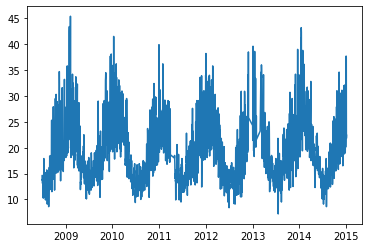

In [12]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'],melb['Temp3pm'])
plt.show()

# We have successfuly removed the data from 2015

In [13]:
melb.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
69846,2015-12-27,Melbourne,NaN,NaN,NaN,4.4,8.9,SSE,48.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69847,2015-12-28,Melbourne,NaN,NaN,NaN,6.0,13.3,SSE,39.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69848,2015-12-29,Melbourne,NaN,NaN,NaN,8.0,13.4,S,35.0,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69849,2015-12-30,Melbourne,NaN,NaN,NaN,7.0,12.4,SSE,44.0,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69850,2015-12-31,Melbourne,NaN,NaN,NaN,15.2,11.4,NNW,48.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [14]:
# Whenever we train the model using Neueal Prophet, it gonna need only and only 2 values as parameters.
# 1 = Data and time (DS stand for dates)
# 2 = expect another column y which we are going to predict.

# Since it requires only 2 values so we are going to remove all the other columns from the data set.


In [15]:
data = melb[['Date','Temp3pm']] # we specifically grab the melb dataframe and point only these 2 columns.
# if you wanted to forecast something else, e.g. Rainfall etc, you can change the second variable as Rainfall.
data.dropna(inplace = True) # # removing any missing values.
data.columns = ['ds', 'y'] # rename the column Date and Temp3pm to ds and y
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Vishal Kashyap\AppData\Local\Temp\ipykernel_5432\3768302879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True) # # removing any missing values.



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


In [16]:
data

,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6
...,...,...
69486,2015-01-01,23.7
69487,2015-01-02,37.7
69488,2015-01-03,37.4
69489,2015-01-04,21.8


# Train Model

In [17]:
m = NeuralProphet() # Creating a new untrained Neural prophet Model and store it into variable 'm'


In [18]:
m.fit(data, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 1.23E-01


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 1.23E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.83E-02
Epoch[152/152]: 100%|█| 152/152 [00:57<00:00,  2.64it/s, SmoothL1Loss=0.0145, MAE=3.02, RMSE=3.94, Loss=0.0108, RegLoss


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.654131,24.933773,30.553432,0.487382,0.0
1,0.552159,22.233921,27.441848,0.408124,0.0
2,0.429955,18.878378,23.535613,0.313701,0.0
3,0.289508,14.711397,18.632333,0.206815,0.0
4,0.153313,10.162223,12.985282,0.104658,0.0
...,...,...,...,...,...
147,0.014546,3.024081,3.951066,0.010862,0.0
148,0.014534,3.027731,3.941122,0.010855,0.0
149,0.014519,3.023185,3.924624,0.010841,0.0
150,0.014514,3.020737,3.944377,0.010837,0.0


# Forecast Away 

In [19]:
future = m.make_future_dataframe(data, periods=1200) # we have created a forecast model and we forecast it for 900 periods
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.917% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,NaN,25.885983,20.259651,5.342091,0.284239
1,2015-01-07,None,NaN,25.719543,20.260395,5.479851,-0.020702
2,2015-01-08,None,NaN,25.968399,20.261141,5.613540,0.093717
3,2015-01-09,None,NaN,26.051403,20.261887,5.742458,0.047061
4,2015-01-10,None,NaN,26.097027,20.262630,5.865934,-0.031539


In [20]:
forecast.tail()

,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
1195,2018-04-15,None,NaN,21.643749,21.149059,0.533170,-0.038481
1196,2018-04-16,None,NaN,21.191793,21.149803,0.376284,-0.334296
1197,2018-04-17,None,NaN,21.656940,21.150547,0.222154,0.284239
1198,2018-04-18,None,NaN,21.201710,21.151293,0.071117,-0.020702
1199,2018-04-19,None,NaN,21.169224,21.152035,-0.076528,0.093717


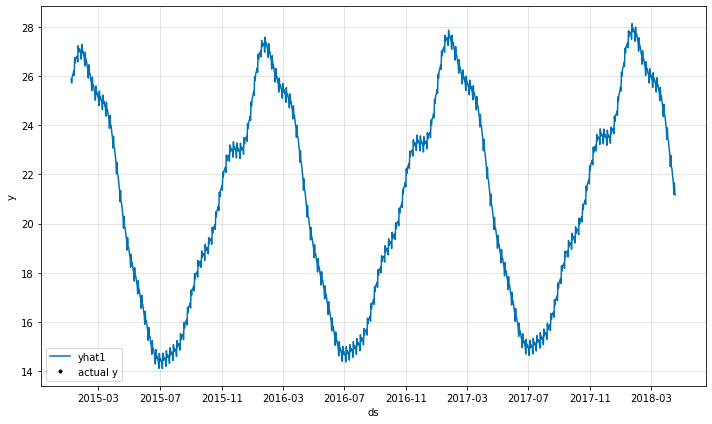

In [21]:
plot1 = m.plot(forecast)

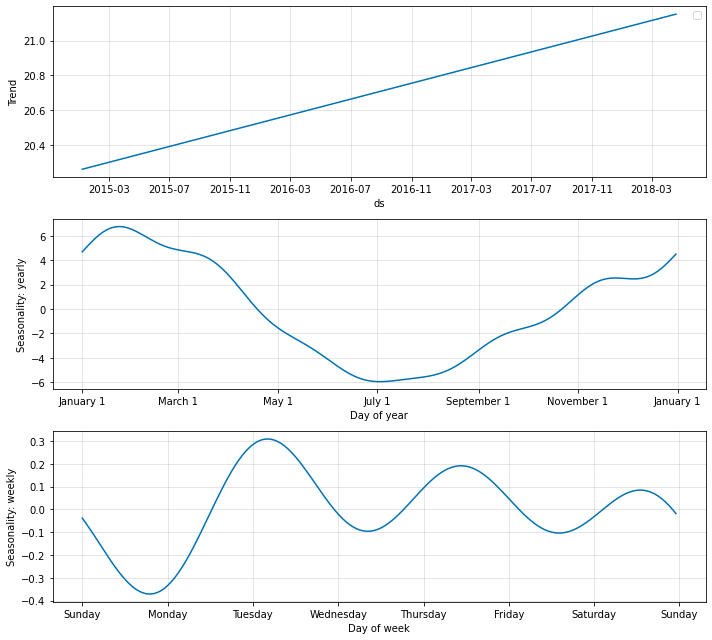

In [22]:
plot2 = m.plot_components(forecast)

# Save Model

In [23]:
with open('forecast_model.pkl',"wb") as f:
    pickle.dump(m,f)

In [24]:
m